In [4]:
import pandas as pd
from datetime import datetime

In [5]:
mythenquai = pd.read_csv("C:/Users/lucal/Documents/HSG/7._Semester/DSF/Project/messwerte_mythenquai_2007-2021 (2).csv", sep=",")
#mythenquai.drop(columns="timestamp_utc", inplace=True)

In [6]:

mythenquai['datetime'] = pd.to_datetime(mythenquai['timestamp_utc'])
mythenquai.drop(columns=["timestamp_utc", "timestamp_cet"], inplace=True)
#mythenquai['datetime'] = mythenquai['datetime'].tz_convert("Europe/Berlin")


In [7]:
df = mythenquai.groupby([pd.Grouper(freq='H', key='datetime')]).mean().reset_index()
df.set_index("datetime", inplace=True)

In [8]:
df = df.tz_convert('Europe/Berlin')

#df["datetime"].astimezone(pytz.timezone('Europe/Berlin'))

In [9]:
df = df.reset_index(level=0)
df["change_rate"] = df["water_level"].pct_change()

In [10]:
df["water_level"].min()

405.22

In [11]:
#df.to_csv("Mythenquai_anually.csv", index=False)

In [12]:
#fourier transformation

In [13]:
pd.read_csv("C:/Users/lucal/Documents/HSG/7._Semester/DSF/Project/Mythenquai_anually.csv", sep=",")

,datetime,air_temperature,water_temperature,wind_gust_max_10min,wind_speed_avg_10min,wind_force_avg_10min,wind_direction,windchill,barometric_pressure_qfe,precipitation,dew_point,global_radiation,humidity,water_level,change_rate
0,2007-04-22 21:00:00+02:00,18.075000,15.200000,1.100000,0.450000,0.450000,226.500000,18.075000,973.675000,0.0,5.000000,3.0,41.750000,405.94,NaN
1,2007-04-22 22:00:00+02:00,16.850000,15.333333,1.350000,0.916667,0.916667,159.000000,16.850000,974.083333,0.0,6.716667,3.0,51.000000,405.94,0.0
2,2007-04-22 23:00:00+02:00,15.250000,15.216667,1.266667,0.633333,0.633333,171.166667,15.250000,974.533333,0.0,7.733333,3.0,60.666667,405.94,0.0
3,2007-04-23 00:00:00+02:00,14.383333,15.233333,1.616667,1.100000,1.100000,174.000000,14.383333,975.066667,0.0,8.250000,3.0,66.833333,405.94,0.0
4,2007-04-23 01:00:00+02:00,13.666667,15.183333,1.616667,1.183333,1.183333,165.000000,13.666667,975.316667,0.0,7.833333,3.0,67.666667,405.94,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128808,2021-12-31 20:00:00+01:00,7.400000,NaN,4.266667,3.383333,2.666667,153.333333,4.450000,1027.750000,NaN,6.200000,NaN,92.166667,NaN,0.0
128809,2021-12-31 21:00:00+01:00,6.733333,NaN,2.883333,2.116667,2.000000,165.333333,5.633333,1027.916667,NaN,5.933333,NaN,94.500000,NaN,0.0
128810,2021-12-31 22:00:00+01:00,6.666667,NaN,2.150000,1.283333,1.166667,134.166667,6.483333,1028.416667,NaN,5.866667,NaN,94.666667,NaN,0.0
128811,2021-12-31 23:00:00+01:00,6.233333,NaN,1.616667,0.766667,0.833333,148.166667,6.216667,1028.983333,NaN,5.533333,NaN,95.500000,NaN,0.0


c:\Users\lucal\miniconda3\envs\dsf\lib\site-packages\matplotlib\axes\_base.py:2539: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


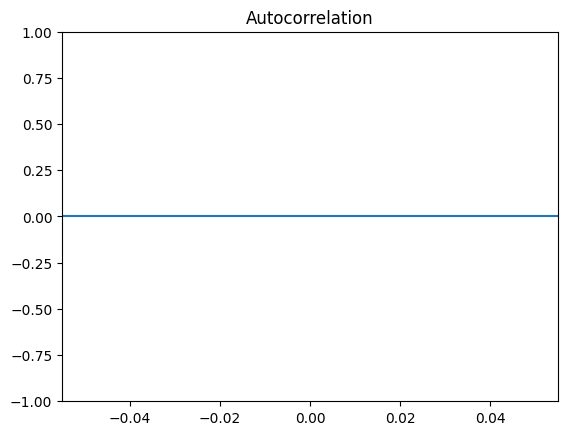

In [14]:
# Autocorellation

from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df["water_level"])
pyplot.show()

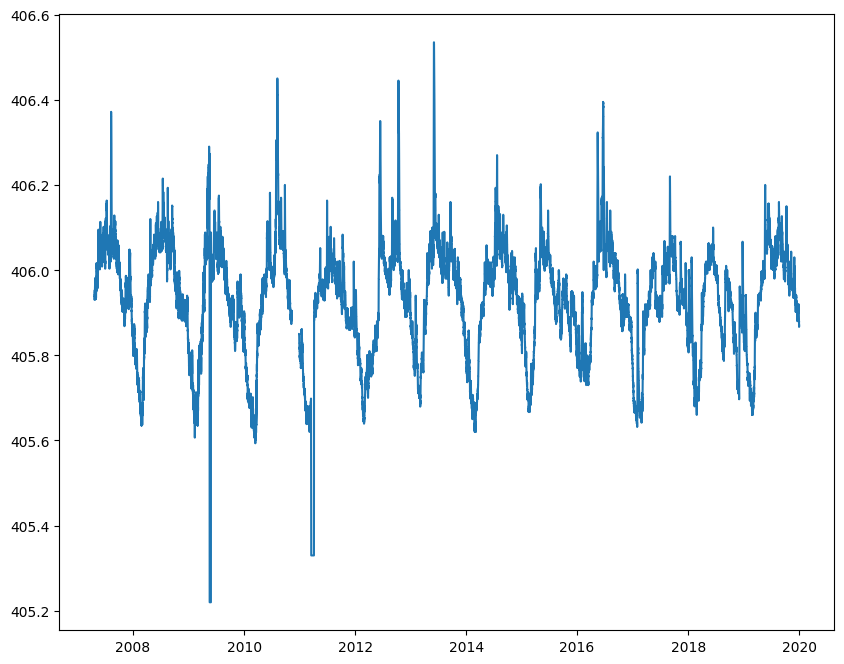

In [18]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(df["datetime"], df["water_level"])

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(df.loc[df["datetime"].isin(range("2012-01-01 00:00:00+01:00","2012-01-01 00:00:00+01:00")), ), df["water_level"])

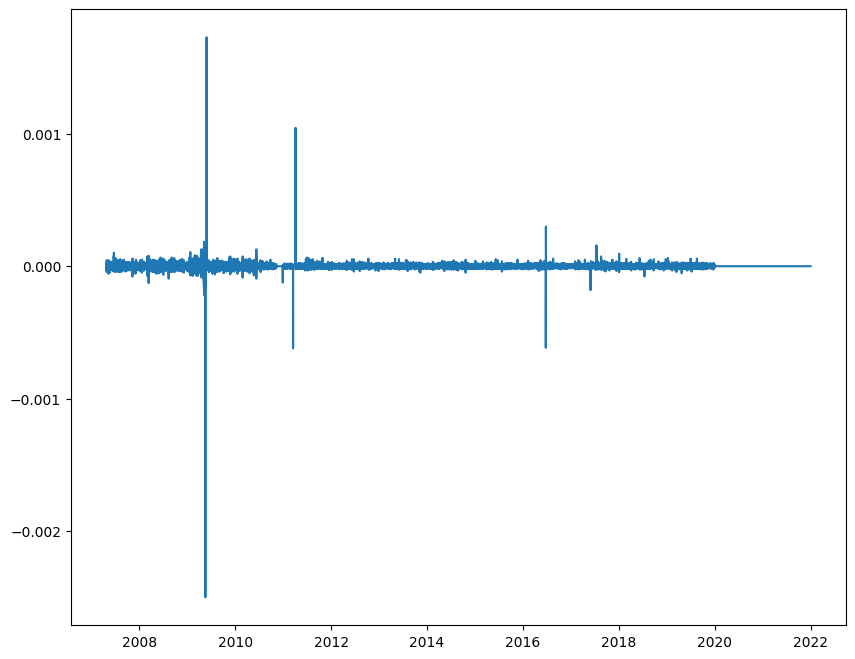

In [19]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(df["datetime"], df["change_rate"])